In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from wordcloud import WordCloud, STOPWORDS
import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))
        
#import surprise
#from surprise import Reader
#from surprise import Dataset
#from surprise.model_selection import train_test_split
import time
#from surprise import SVD
#from surprise import accuracy
import re
import plotly.express as px
import scipy as sp


from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline  import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, Normalizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge

from sklearn.metrics import mean_squared_error

from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
#data_folder = '/kaggle/input/edsa-recommender-system-predict/'
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')
imdb_df = pd.read_csv('imdb_data.csv')
genome_tags_df = pd.read_csv('genome_tags.csv')
genome_score_df = pd.read_csv('genome_scores.csv')

In [4]:
train_df

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [5]:
test_df

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318
...,...,...
5000014,162541,4079
5000015,162541,4467
5000016,162541,4980
5000017,162541,5689


In [6]:
tags_df

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


In [7]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [8]:
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [9]:
imdb_df

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


In [10]:
genome_tags_df

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [11]:
genome_score_df

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [12]:
train_df.head(2)
#two features, rating and timestamp

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739


In [13]:
train_df.info()
#10 000 038 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [14]:
len(train_df['movieId'].unique())
#48 213 movies

48213

In [15]:
len(train_df['userId'].unique())
#162 541 moviees

162541

Users have rated multiple movies 

In [16]:
test_df.head(2)

,userId,movieId
0,1,2011
1,1,4144


In [17]:
tags_df.head(2)
#tags possible new feature to improve recommender

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256


In [18]:
len(tags_df['movieId'].unique())
#45 251 movies, some are missing

45251

In [19]:
movies_df.head(2)
#what is the difference between genre and tag?

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [20]:
tags_df['tag'].unique()

array(['classic', 'sci-fi', 'dark comedy', ..., 'genre busting',
       'the wife did it', 'cornetto triolgy'], dtype=object)

In [21]:
movies_df['genres'].unique()
#genre and tag not the same

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Children|Comedy|Fantasy|Mystery', 'Children|Comedy|Crime|Fantasy',
       'Comedy|Horror|Mystery|Sci-Fi|Western'], dtype=object)

In [22]:
links_df.head(2)
#??

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [23]:
imdb_df.head(2)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


A genome tag is a single characteristic exhibited by a movie (for example, atmospheric, thought-provoking, realistic, etc.). Each genome tag score reflects the relevance of a tag to a movie on a scale of 0 to 1.

In [24]:
genome_tags_df.head(2)

,tagId,tag
0,1,007
1,2,007 (series)


In [25]:
genome_score_df.head(2)

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375


# Hyper EDA

In [26]:
#based on the type of output will make a good case for classification of its data, as genre per average budget per rating
unique_genre = list(movies_df['genres'].unique())

In [27]:
unique_budget = list(imdb_df['budget'].unique())

In [28]:
#display(train_df, imdb_df, movies_df, pd.merge(train_df, imdb_df, on='movieId'))
merg = pd.merge(imdb_df, movies_df, how='outer', on='movieId')
merg

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy
...,...,...,...,...,...,...,...,...
64830,209157,NaN,NaN,NaN,NaN,NaN,We (2018),Drama
64831,209159,NaN,NaN,NaN,NaN,NaN,Window of the Soul (2001),Documentary
64832,209163,NaN,NaN,NaN,NaN,NaN,Bad Poems (2018),Comedy|Drama
64833,209169,NaN,NaN,NaN,NaN,NaN,A Girl Thing (2001),(no genres listed)


In [29]:
merg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64835 entries, 0 to 64834
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        64835 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
 6   title          62423 non-null  object 
 7   genres         62423 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 4.5+ MB


In [36]:
def extract_year(a_list):
    y = []
    for txt in a_list:
        x = txt[txt.find('(')+1:txt.find(')')] 

        y.append(x)
    return y    

In [37]:
merg['release_year'] = extract_year(merg['title'].astype('str'))

In [45]:
merg['release_year'] = merg['release_year'].replace('\D','', regex=True)
#some number in movie names were collected remove them
merg['release_year'] = merg['release_year'].apply(lambda x: ''.join([x if len(x) >= 4 else '']))


In [48]:
merg['genres'] = merg.genres.astype(str).apply(lambda x: x.split('|'))

In [50]:
def change_genre(genre):
    # dictionary to map old and new name
    dct_ = {'Sci-Fi':'Sci_Fi','Film-Noir':'Film_Noir',
            '(no genres listed)':'no_genres_listed'}
    lst = [] # list to store genres in genre
    # iterate inside of the the genre in each row
    for i in genre:
        # change only the words in the dict_
        if i in dct_.keys():
            i = dct_[i]
            lst.append(i)
        else:
            # leave other words as they are
            i = i
            lst.append(i)
    # return genre strings
    return " ".join(lst)

In [51]:
merg['genres'] = merg.genres.apply(change_genre)

In [52]:
merg

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres,release_year
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure Animation Children Comedy Fantasy,1995
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure Children Fantasy,1995
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy Romance,1995
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy Drama Romance,1995
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...,...,...,...,...,...
64830,209157,NaN,NaN,NaN,NaN,NaN,We (2018),Drama,2018
64831,209159,NaN,NaN,NaN,NaN,NaN,Window of the Soul (2001),Documentary,2001
64832,209163,NaN,NaN,NaN,NaN,NaN,Bad Poems (2018),Comedy Drama,2018
64833,209169,NaN,NaN,NaN,NaN,NaN,A Girl Thing (2001),no_genres_listed,2001


### EDA

In [35]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [36]:
train_df.shape

(10000038, 4)

Range of ratings

C:\Users\HELLO\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\HELLO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Average rating in dataset: 3.5333951730983424


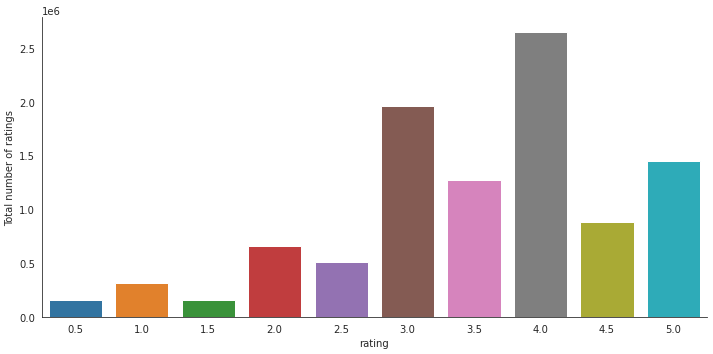

In [37]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(train_df["rating"])}')

##### Rating count

In [38]:
# To find the number of times a user rated a movie, we create a data frame with the count by userId
user = pd.DataFrame(
    train_df['userId'].value_counts()).reset_index()
user.rename(columns={'index':'userId','userId':'rating count'},
                  inplace=True)

user = user.sort_values(by=['rating count'], ascending=False)
user.head()

,userId,rating count
0,72315,12952
1,80974,3680
2,137293,3588
3,33844,3208
4,20055,3050


User 72315 seems to be an outlier??

### Movies Dataset

In [39]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
movies_df.shape

(62423, 3)

In [41]:
genres = pd.DataFrame(movies_df['genres'].
                      str.split("|").
                      tolist(),
                      index=movies_df['movieId']).stack()
genres = genres.reset_index([0, 'movieId'])
genres.columns = ['movieId', 'Genre']
genres.head(15)

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
5,2,Adventure
6,2,Children
7,2,Fantasy
8,3,Comedy
9,3,Romance


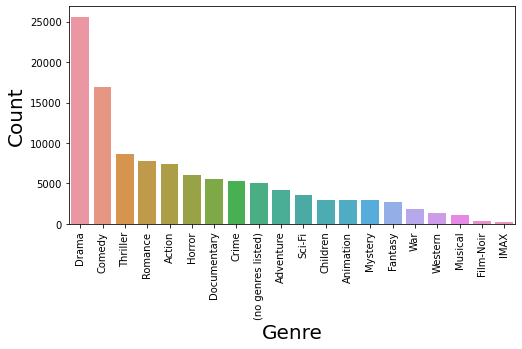

In [42]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x='Genre',
              data=genres,
              order=genres['Genre'].
              value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.show()

Most rated movies  (mrm)

In [49]:
movies=pd.merge(train_df, movies_df,on='movieId',how='inner')
movies.head(5)

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [50]:
table = pd.pivot_table(movies, values =['rating'], index =['title'], aggfunc='count')
table = table.sort_values(by=['rating'], ascending=False)
table = table.reset_index(level=0)
table.rename(columns={'rating':'rating count'},
                  inplace=True)
result = table.truncate(after = 9)
result

,title,rating count
0,"Shawshank Redemption, The (1994)",32831
1,Forrest Gump (1994),32383
2,Pulp Fiction (1994),31697
3,"Silence of the Lambs, The (1991)",29444
4,"Matrix, The (1999)",29014
5,Star Wars: Episode IV - A New Hope (1977),27560
6,Jurassic Park (1993),25518
7,Schindler's List (1993),24004
8,Braveheart (1995),23722
9,Fight Club (1999),23536


<AxesSubplot:xlabel='title'>

<Figure size 1440x720 with 0 Axes>

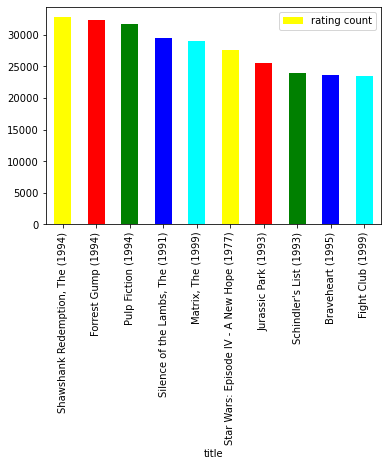

In [51]:
plt.figure(figsize=(20, 10))
result.plot('title', 'rating count', kind='bar', color=['yellow', 'red', 'green', 'blue', 'cyan'])